# Chapter 3. Relationships between Variables

So far, we have seen different ways to summarize and visualize individual variables in a `DataFrame`. But we have not really discussed how to summarize and visualize _relationships_ between variables. This chapter is all about how to understand relationships _between_ columns in our data set.


**Documentation**:


* Scatter plots (note, this is a `DataFrame` method) pandas.DataFrame.plot.scatter(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html
* Correlations: pandas.DataFrame.corr(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* Scatter Matrix: pandas.plotting.scatter_matrix(): https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html


# 3.1 Relationships between Quantitative Variables

We will begin by looking at ways to summarize and visualize relationships between _quantitative_ variables. To do this, we will look at a data set of house prices in Ames, Iowa. This data set is stored in a tab-separated values file.

In [15]:
%matplotlib inline
import pandas as pd

df = pd.read_csv("../data/AmesHousing.txt", sep="\t")

df.columns


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

## Visualization

Let's start by visualizing the relationship between the square footage (of the dwelling) and the sale price. To do this, we can make a scatterplot. In a scatterplot, each observation is represented by a point. The $(x, y)$ coordinates of each point represent the values of two variables for that observation. So a scatterplot conveys information about the relationship between two quantitative variables.

First, let us take a look at a few variables we will be working with


In [17]:
ourColumns = ["Gr Liv Area", "Bedroom AbvGr", "SalePrice", "Lot Area", "Full Bath", "Half Bath"]

df[ourColumns]

Gr Liv Area  Bedroom AbvGr  SalePrice  Lot Area  Full Bath  Half Bath
0            1656              3     215000     31770          1          0
1             896              2     105000     11622          1          0
2            1329              3     172000     14267          1          1
3            2110              3     244000     11160          2          1
4            1629              3     189900     13830          2          1
...           ...            ...        ...       ...        ...        ...
2925         1003              3     142500      7937          1          0
2926          902              2     131000      8885          1          0
2927          970              3     132000     10441          1          0
2928         1389              2     170000     10010          1          0
2929         2000              3     188000      9627          2          1

[2930 rows x 6 columns]


To make a scatterplot in `pandas`, we use the `.plot.scatter()` method of `DataFrame`. Since there are multiple columns in the `DataFrame`, we have to specify which variable is $x$ and which variable is $y$.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

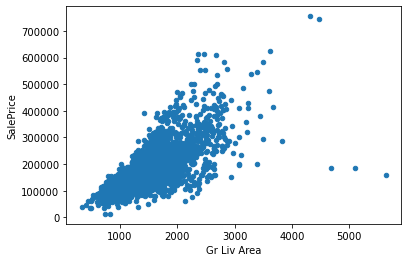

In [9]:
df.plot.scatter(x="Gr Liv Area", y="SalePrice")

We see that square footage (of the dwelling) and the sale price are positively correlated. That is, the greater the living area, the higher the sale price.

It is not easy to visualize relationships in more than two dimensions. One way is to use the sizes and colors of the points on a scatterplot to represent additional variables. The `.plot.scatter()` function also takes in two additional arguments `s=` and `c=` that do this. For example, if we wanted to also include the effect of the number of bedrooms on the above scatterplot, we could use the color variable.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

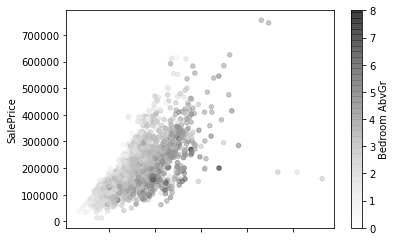

In [3]:
df.plot.scatter(x="Gr Liv Area", y="SalePrice", c="Bedroom AbvGr", alpha=.5)

Notice how the colors become lighter as you move up the plot. That means that, holding square footage constant, a house is more expensive the _fewer_ bedrooms it has. (Why do you think this is?)

Another way to visualize the relationship between multiple quantitative variables is to visualize them two at a time, by creating a scatterplot matrix. Let's use a scatterplot to visualize the pairwise relationships between square footage, number of bedrooms, number of (full) bathrooms, and sale price. (We have to select these variables from the `DataFrame` first.)

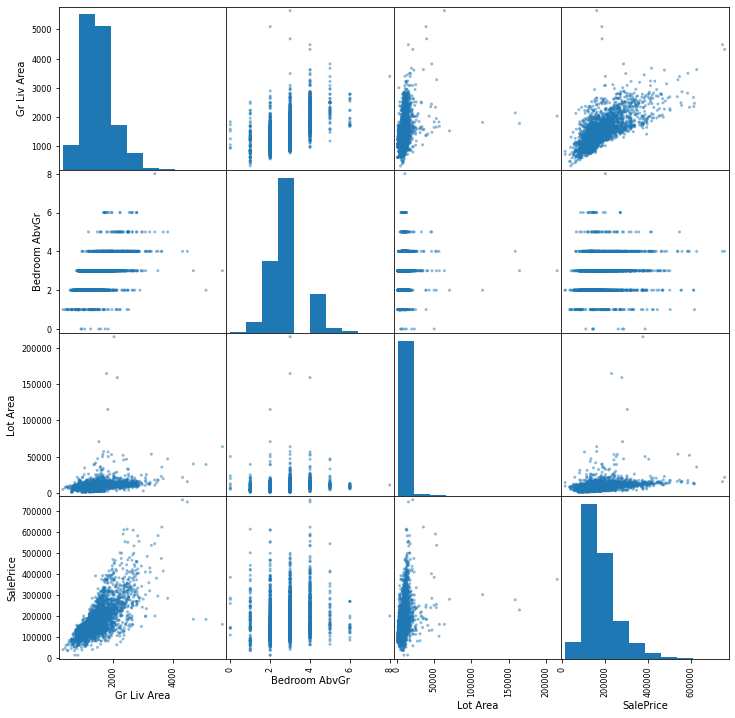

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(
    df[["Gr Liv Area", "Bedroom AbvGr", "Lot Area", "SalePrice"]],
    figsize=(12, 12)
);

**Food for Thought:**

- Why do you think histograms are plotted along the diagonal of this matrix, instead of scatterplots?
- Why does the scatterplot of the number of bathrooms vs. number of bedrooms look different from the scatterplot of, say, sale price vs. square footage?
- Which plots in this matrix communicate the exact same information? Can you determine how the plots correspond?

## Summary Statistics

To summarize the relationship between two quantitative variables, we can calculate the _correlation coefficient_, symbolized $r$. The correlation coefficient is a number between $-1$ and $1$, representing the strength of the linear relationship. A correlation coefficient of $r = \pm 1$ means that the points fall perfectly along a line. The sign of the correlation coefficient indicates whether the relationship is positive or negative.

The figure below shows some hypothetical scatterplots and their correlations.

<img src="correlation.png">

Notice that a correlation of 0 doesn't mean that there's no relationship _at all_ between the variables; it only says that there's no _linear_ relationship between them.

To calculate the correlation between two variables, we can call the `.corr()` method of `pandas` `Series`. Remember that correlation requires two variables, so the `.corr()` method takes in the other variable as an argument.

In [18]:
df["Gr Liv Area"].corr(df["SalePrice"])

0.7067799209766282

The correlation is positive, which is obvious if we look at the scatterplot. It is also reasonably close to 1, so the relationship between the two variables is close to linear.

Just as we made a scatterplot matrix, we can also make a correlation matrix that displays the correlation between all pairs of variables in our data set. To do this, we call the `.corr()` method of `DataFrame`, which will return a matrix of pairwise correlations between all of the variables in the `DataFrame`.

In [20]:
df[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "SalePrice",  "Lot Area"]].corr()

Gr Liv Area  Bedroom AbvGr  Full Bath  SalePrice  Lot Area
Gr Liv Area       1.000000       0.516808   0.630321   0.706780  0.285599
Bedroom AbvGr     0.516808       1.000000   0.359489   0.143913  0.136569
Full Bath         0.630321       0.359489   1.000000   0.545604  0.127433
SalePrice         0.706780       0.143913   0.545604   1.000000  0.266549
Lot Area          0.285599       0.136569   0.127433   0.266549  1.000000

# Exercises

**Exercise 1.** What is the correlation between any variable and itself? Check your answer with any three numeric variables from the Ames house prices data set.

In [ ]:
# ENTER YOUR CODE HERE

Exercises 2-4 deal with the Tips data set (`../data/tips.csv`).

In [25]:
tipsDF = pd.read_csv("../data/tips.csv")

tipsDF.head()


total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

**Exercise 2.** The Tips data set includes both quantitative and categorical variables, but correlation is only defined for quantitative variables. What happens when you call `.corr()` on the entire `DataFrame`?

In [ ]:
# ENTER YOUR CODE HERE

Provide an explanation here:

**Exercise 3-1.** Make a scatterplot showing the relationship between the tip and the total bill. Use color to indicate whether the tipper was male or female.



In [ ]:
# ENTER YOUR CODE HERE

**Exercise 3-2**:  Update the scatterplot from **Exercsize 3-1** to use the size of each point to represent the size of the party.

In [ ]:
# ENTER YOUR CODE HERE

**Exercise 3-3.** Make a scatterplot showing the relationship between the tip and the total bill. Use color to indicate whether there was a smoker in the party


In [ ]:
#ENTER YOUR  CODE HERE

**Exercise 3-4**:  Update the scatterplot from **Exercsize 3-3** to use the size of each point to represent the size of the party.

In [26]:
#ENTER YOUR CODE HERE

**Exercise 3-5** Explain in "plain English" what you are observing on the scatterplots from **Exercises 3-1 -- 3-4**. Try to formulate your answer in a form of a story.

**Your answer here**:

**Exercise 4.** Make a scatterplot matrix showing the pairwise relationships between the total_bill, tip, and table size.

In [ ]:
# ENTER YOUR CODE HERE

**Exercise 5.** To build your intuition about correlation, play this [correlation guessing game](http://guessthecorrelation.com/). There is even a two-player mode that allows you to play against a friend in the class.

**What was your best score?**